# IMPORTAR LIBRERIAS

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from collections import Counter
from wordcloud import WordCloud
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict

from sklearn.metrics import precision_recall_fscore_support


# CARGAR DATASET

In [2]:
df_genres = pd.read_csv(r"C:\Users\debgd\Documents\CursoMAchine\NLP\IMDb\movies_genres.csv")
df_overview = pd.read_csv(r"C:\Users\debgd\Documents\CursoMAchine\NLP\IMDb\movies_overview.csv")

In [3]:
df_genres.head(30)

,id,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [4]:
df_overview.head(30)

,title,overview,genre_ids
0,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,"[18, 80]"
1,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","[18, 80]"
2,The Godfather Part II,In the continuing saga of the Corleone crime f...,"[18, 80]"
3,Schindler's List,The true story of how businessman Oskar Schind...,"[18, 36, 10752]"
4,12 Angry Men,The defense and the prosecution have rested an...,[18]
5,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...","[16, 10751, 14]"
6,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","[35, 18, 10749]"
7,The Dark Knight,Batman raises the stakes in his war on crime. ...,"[18, 28, 80, 53]"
8,The Green Mile,A supernatural tale set on death row in a Sout...,"[14, 18, 80]"
9,Parasite,"All unemployed, Ki-taek's family takes peculia...","[35, 53, 18]"


In [5]:
df_overview.head(5)

,title,overview,genre_ids
0,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,"[18, 80]"
1,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","[18, 80]"
2,The Godfather Part II,In the continuing saga of the Corleone crime f...,"[18, 80]"
3,Schindler's List,The true story of how businessman Oskar Schind...,"[18, 36, 10752]"
4,12 Angry Men,The defense and the prosecution have rested an...,[18]


In [6]:
import ast


df_overview['genre_ids'] = df_overview['genre_ids'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

genre_id_to_name = dict(zip(df_genres['id'], df_genres['name']))

df_overview['genre_names'] = df_overview['genre_ids'].apply(
    lambda ids: [genre_id_to_name.get(i, f"Unknown({i})") for i in ids]
)

In [7]:
df_overview.head()

,title,overview,genre_ids,genre_names
0,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,"[18, 80]","[Drama, Crime]"
1,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","[18, 80]","[Drama, Crime]"
2,The Godfather Part II,In the continuing saga of the Corleone crime f...,"[18, 80]","[Drama, Crime]"
3,Schindler's List,The true story of how businessman Oskar Schind...,"[18, 36, 10752]","[Drama, History, War]"
4,12 Angry Men,The defense and the prosecution have rested an...,[18],[Drama]


# Limpieza de datos

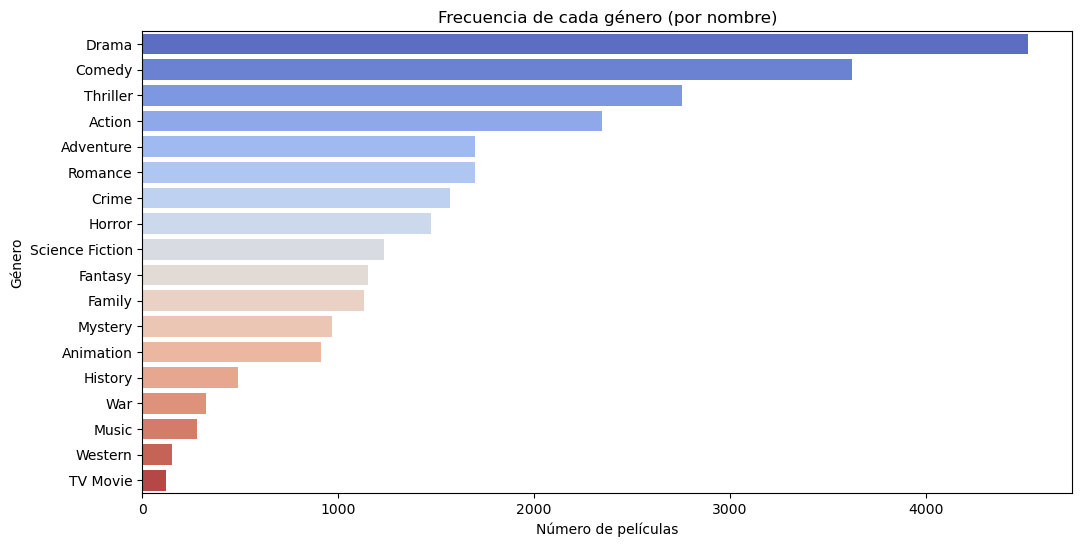

In [8]:

all_genre_names = sum(df_overview['genre_names'], [])
genre_name_counts = Counter(all_genre_names)

genre_name_df = pd.DataFrame(genre_name_counts.items(), columns=['genre_name', 'count'])

plt.figure(figsize=(12,6))
sns.barplot(data=genre_name_df.sort_values('count', ascending=False), x='count', y='genre_name', palette='coolwarm')
plt.title('Frecuencia de cada género (por nombre)')
plt.xlabel('Número de películas')
plt.ylabel('Género')
plt.show()

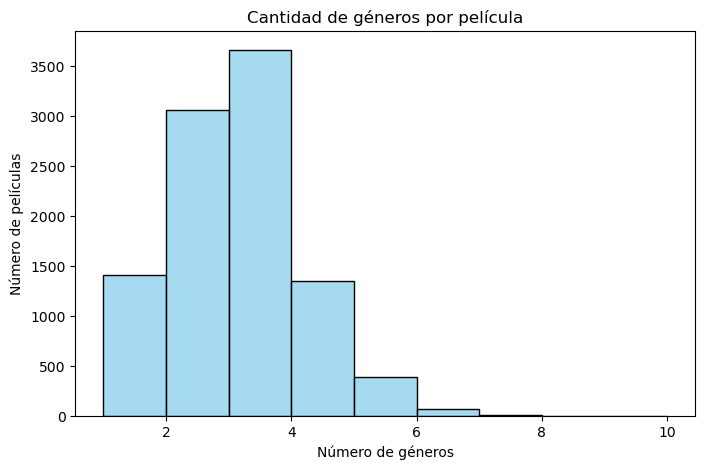

In [9]:
df_overview['num_genres'] = df_overview['genre_names'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(df_overview['num_genres'], bins=range(1, df_overview['num_genres'].max()+2), kde=False, color='skyblue')
plt.title('Cantidad de géneros por película')
plt.xlabel('Número de géneros')
plt.ylabel('Número de películas')
plt.show()

In [10]:

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # quitar símbolos
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\debgd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debgd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:

genre_word_dict = defaultdict(list)

for _, row in df_overview.iterrows():
    tokens = clean_text(row['overview'])
    for genre in row['genre_names']:
        genre_word_dict[genre].extend(tokens)



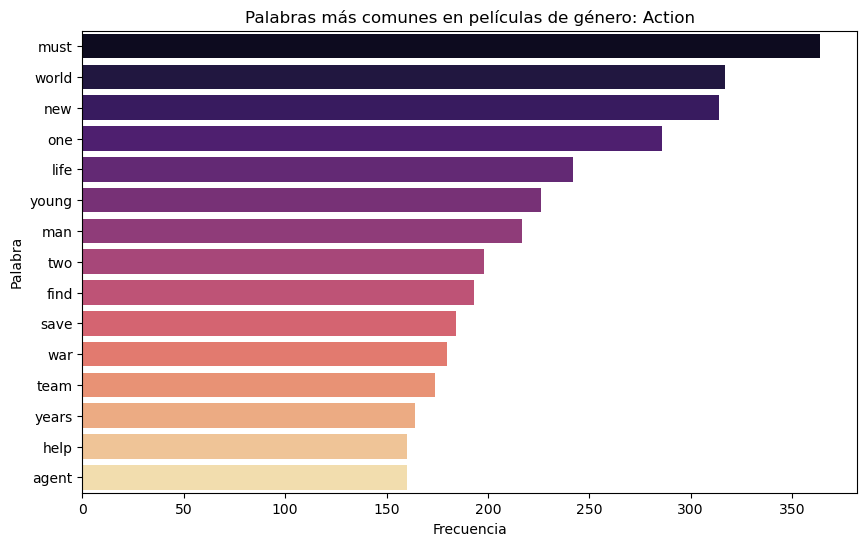

In [12]:

genre = 'Action'  
words = genre_word_dict[genre]
word_counts = Counter(words).most_common(15)

# Convertir a DataFrame
wc_df = pd.DataFrame(word_counts, columns=['word', 'count'])

plt.figure(figsize=(10,6))
sns.barplot(data=wc_df, x='count', y='word', palette='magma')
plt.title(f'Palabras más comunes en películas de género: {genre}')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

In [13]:
df_genres = pd.read_csv(r"C:\Users\debgd\Documents\CursoMAchine\NLP\IMDb\movies_genres.csv")
df_overview = pd.read_csv(r"C:\Users\debgd\Documents\CursoMAchine\NLP\IMDb\movies_overview.csv")

## Datos duplicados

In [14]:
df_overview.duplicated().unique()

array([False,  True])

In [15]:
df_overview.duplicated().sum()

2

In [16]:
df_overview[df_overview.duplicated()]

,title,overview,genre_ids
5120,Little Italy,Former childhood pals Leo and Nikki are attrac...,"[35, 10749]"
7330,Fritz the Cat,"A swinging, hypocritical college student cat r...","[16, 35, 18]"


## Errores estructurales 

## Datos vacios

In [17]:
df_overview.isna().any()

title        False
overview     False
genre_ids    False
dtype: bool

## Revisar tipo de datos

In [18]:
df_overview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      9980 non-null   object
 1   overview   9980 non-null   object
 2   genre_ids  9980 non-null   object
dtypes: object(3)
memory usage: 234.0+ KB


# REVISAR DATOS

In [22]:
genres_df = pd.read_csv(r"C:\Users\debgd\Documents\CursoMAchine\NLP\IMDb\movies_genres.csv")
movies_df = pd.read_csv(r"C:\Users\debgd\Documents\CursoMAchine\NLP\IMDb\movies_overview.csv")

# PREPARACION DE DATOS PARA EL MODELO

In [23]:

genre_map = dict(zip(genres_df['id'], genres_df['name']))

import ast
movies_df['genre_ids'] = movies_df['genre_ids'].apply(ast.literal_eval)

movies_df['genres'] = movies_df['genre_ids'].apply(lambda x: [genre_map[i] for i in x])

movies_df['text'] = movies_df['title'] + ' ' + movies_df['overview']

mlb = MultiLabelBinarizer()
genre_labels = mlb.fit_transform(movies_df['genres'])

X_train, X_test, y_train, y_test = train_test_split(
    movies_df['text'], genre_labels, test_size=0.2, random_state=42)

In [24]:
genre_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## TF-IDF para convertir el texto en características numéricas:

In [26]:

tfidf = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# MODELOS

## LogisticRegression

In [27]:

lr = OneVsRestClassifier(LogisticRegression(max_iter=1000))
lr.fit(X_train_tfidf, y_train)

y_pred = lr.predict(X_test_tfidf)
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

                 precision    recall  f1-score   support

         Action       0.87      0.40      0.55       476
      Adventure       0.74      0.18      0.29       326
      Animation       0.93      0.07      0.13       191
         Comedy       0.76      0.49      0.60       721
          Crime       0.82      0.20      0.33       333
          Drama       0.75      0.65      0.69       905
         Family       0.88      0.09      0.16       233
        Fantasy       0.86      0.08      0.14       228
        History       0.00      0.00      0.00        86
         Horror       0.92      0.19      0.31       297
          Music       0.00      0.00      0.00        55
        Mystery       1.00      0.06      0.10       200
        Romance       0.84      0.21      0.34       360
Science Fiction       0.94      0.25      0.39       248
       TV Movie       0.00      0.00      0.00        29
       Thriller       0.75      0.36      0.48       563
            War       0.86    

## Random Forest

In [28]:

rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100))
rf.fit(X_train_tfidf, y_train)

y_pred_rf = rf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_rf, target_names=mlb.classes_))

                 precision    recall  f1-score   support

         Action       0.77      0.34      0.48       476
      Adventure       0.79      0.17      0.28       326
      Animation       0.82      0.19      0.31       191
         Comedy       0.70      0.48      0.57       721
          Crime       0.65      0.29      0.40       333
          Drama       0.65      0.63      0.64       905
         Family       0.67      0.10      0.18       233
        Fantasy       0.72      0.12      0.21       228
        History       1.00      0.01      0.02        86
         Horror       0.80      0.29      0.43       297
          Music       0.00      0.00      0.00        55
        Mystery       0.80      0.04      0.08       200
        Romance       0.78      0.24      0.37       360
Science Fiction       0.94      0.43      0.59       248
       TV Movie       0.00      0.00      0.00        29
       Thriller       0.66      0.32      0.43       563
            War       0.83    

## Red Neuronal (MLP)

In [29]:

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
mlp.fit(X_train_tfidf, y_train)

y_pred_mlp = mlp.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_mlp, target_names=mlb.classes_))

                 precision    recall  f1-score   support

         Action       0.66      0.61      0.63       476
      Adventure       0.54      0.48      0.51       326
      Animation       0.69      0.43      0.53       191
         Comedy       0.63      0.61      0.62       721
          Crime       0.60      0.50      0.55       333
          Drama       0.65      0.66      0.66       905
         Family       0.71      0.48      0.57       233
        Fantasy       0.58      0.39      0.46       228
        History       0.41      0.19      0.26        86
         Horror       0.69      0.56      0.62       297
          Music       0.71      0.31      0.43        55
        Mystery       0.44      0.36      0.40       200
        Romance       0.57      0.44      0.49       360
Science Fiction       0.77      0.62      0.69       248
       TV Movie       0.67      0.07      0.12        29
       Thriller       0.59      0.54      0.57       563
            War       0.79    

# predecir cualquier pelicula

In [30]:
def predecir_generos_con_nombres(titulo, resumen, vectorizer, model, binarizer, id_to_genre):
    texto = titulo + " " + resumen
    X_nuevo = vectorizer.transform([texto])
    pred = model.predict(X_nuevo)
    generos_predichos = binarizer.inverse_transform(pred)[0]
    
    nombres_generos = [id_to_genre.get(gid, "Desconocido") for gid in generos_predichos]
    
    return generos_predichos, nombres_generos

In [34]:
id_to_genre = dict(zip(df_genres['id'], df_genres['name']))

In [35]:
titulo = "Captain America: Brave New World"
overview = " Anthony Mackie returns as the high-flying hero Sam Wilson, who's officially taken up the mantle of Captain America. After meeting with newly elected U.S. President Thaddeus Ross, Sam finds himself in the middle of an international incident. He must discover the reason behind a nefarious global plot before the true mastermind has the entire world seeing red."

print('LOGISTICAL REGRESSION')
ids, nombres = predecir_generos_con_nombres(titulo, overview, tfidf, lr, mlb, id_to_genre)
print("Géneros predichos (genre_ids):", ids)

print('\n\nRed Neuronal (MLP)')

ids, nombres = predecir_generos_con_nombres(titulo, overview, tfidf, mlp, mlb, id_to_genre)

print("Géneros predichos (genre_ids):", ids)

print('\n\nRandom Forest')

ids, nombres = predecir_generos_con_nombres(titulo, overview, tfidf, rf, mlb, id_to_genre)
print("Géneros predichos (genre_ids):", ids)


LOGISTICAL REGRESSION
Géneros predichos (genre_ids): ('Action',)


Red Neuronal (MLP)
Géneros predichos (genre_ids): ('Action', 'Science Fiction', 'Thriller')


Random Forest
Géneros predichos (genre_ids): ('Science Fiction',)


# COMPARACION LogisticRegression, Random Forest, Red Neuronal (MLP)

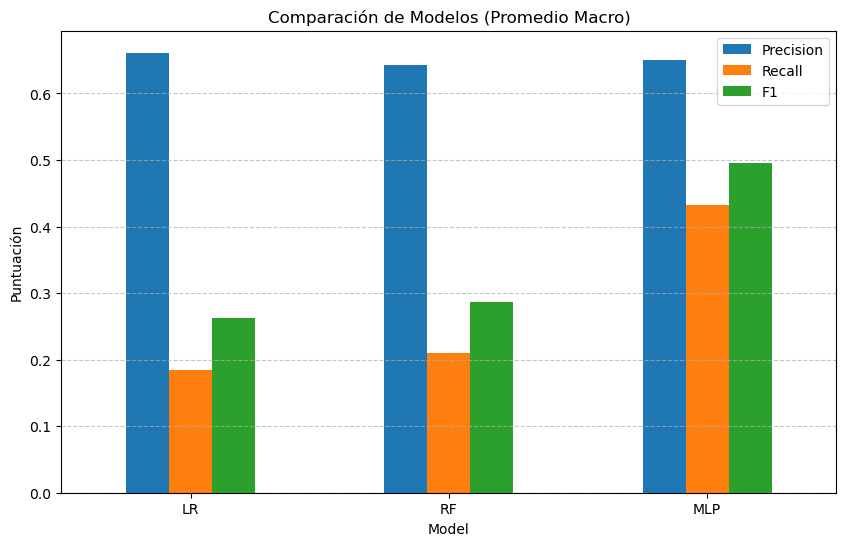

In [36]:

results = []
for name, model in zip(['LR', 'RF', 'MLP'], [lr, rf, mlp]):
    y_pred = model.predict(X_test_tfidf)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': name,
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1': report['macro avg']['f1-score']
    })

results_df = pd.DataFrame(results).set_index('Model')

results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Modelos (Promedio Macro)')
plt.ylabel('Puntuación')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

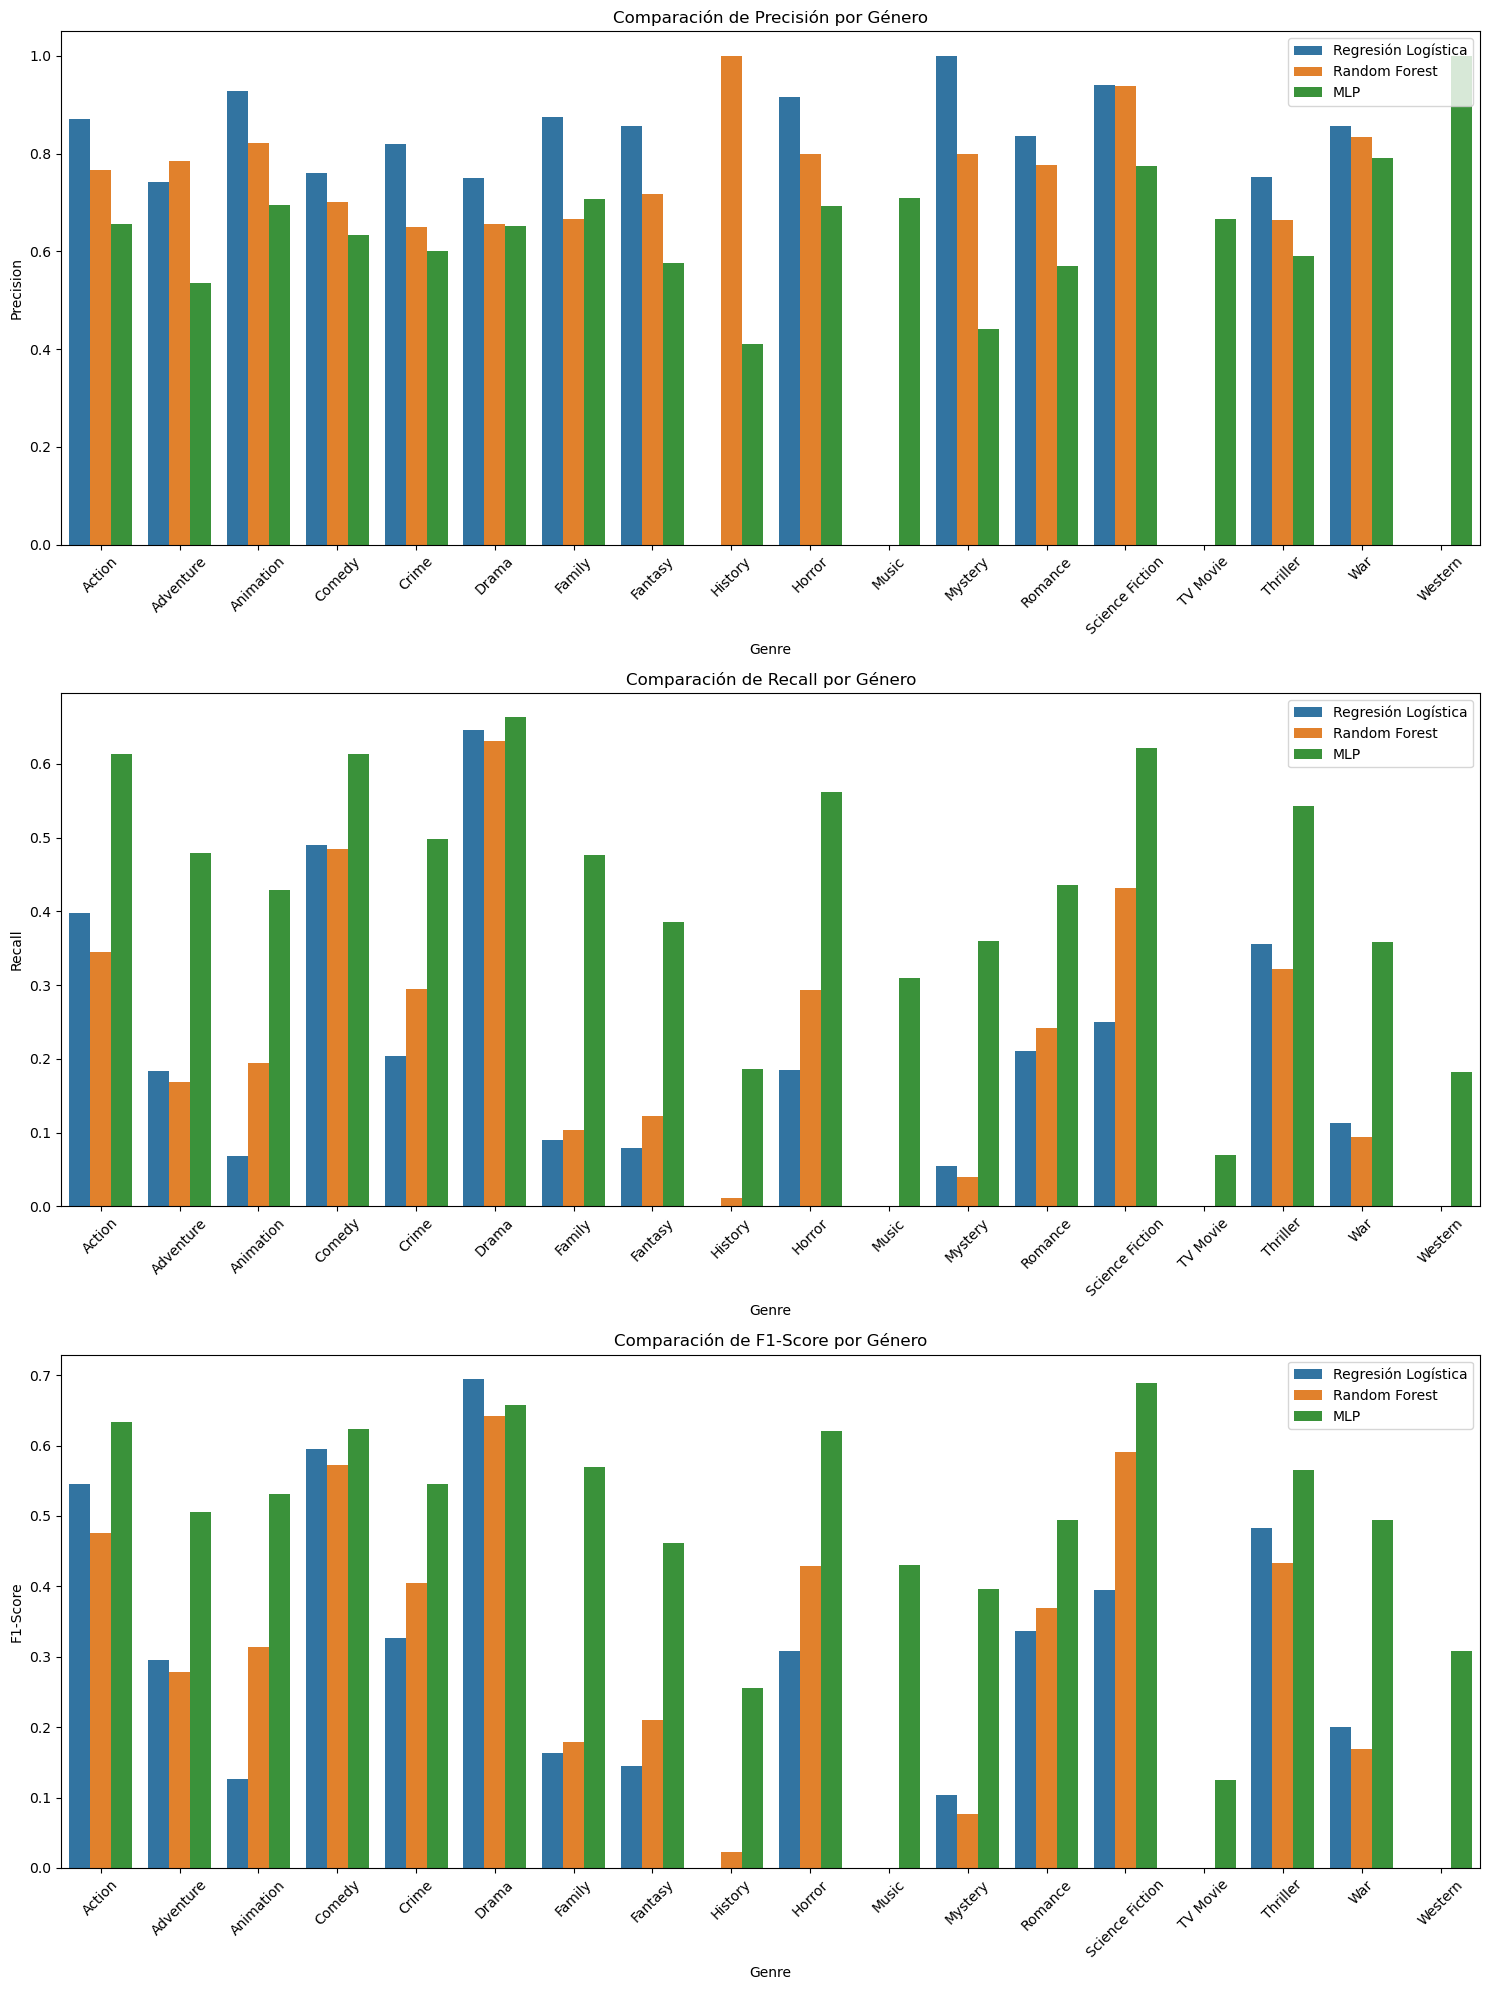

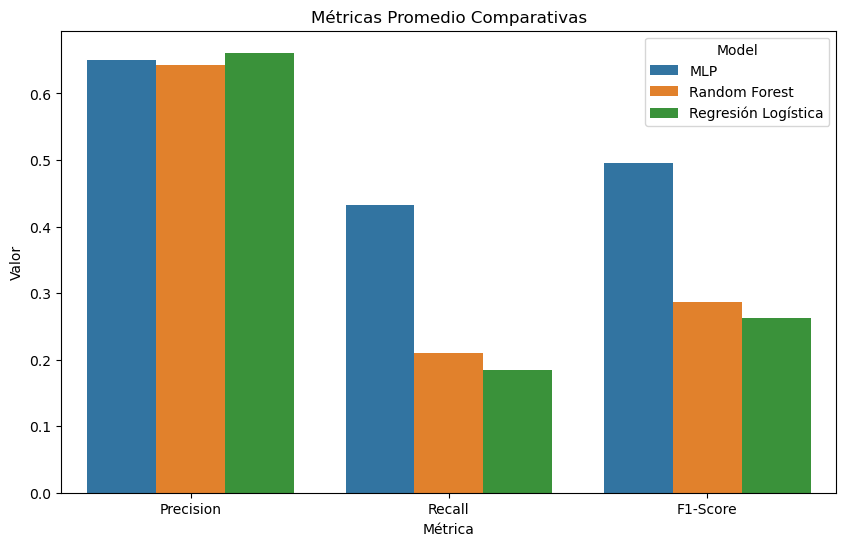

In [37]:

def get_metrics_df(models, model_names, X_test, y_test, class_names):
    metrics = []
    
    for name, model in zip(model_names, models):
        y_pred = model.predict(X_test)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
        
        for i, class_name in enumerate(class_names):
            metrics.append({
                'Model': name,
                'Genre': class_name,
                'Precision': precision[i],
                'Recall': recall[i],
                'F1-Score': f1[i]
            })
    
    return pd.DataFrame(metrics)

models = [lr, rf, mlp] 
model_names = ['Regresión Logística', 'Random Forest', 'MLP']

metrics_df = get_metrics_df(models, model_names, X_test_tfidf, y_test, mlb.classes_)


plt.figure(figsize=(15, 20))


plt.subplot(3, 1, 1)
sns.barplot(data=metrics_df, x='Genre', y='Precision', hue='Model')
plt.title('Comparación de Precisión por Género')
plt.xticks(rotation=45)
plt.legend(loc='upper right')


plt.subplot(3, 1, 2)
sns.barplot(data=metrics_df, x='Genre', y='Recall', hue='Model')
plt.title('Comparación de Recall por Género')
plt.xticks(rotation=45)
plt.legend(loc='upper right')


plt.subplot(3, 1, 3)
sns.barplot(data=metrics_df, x='Genre', y='F1-Score', hue='Model')
plt.title('Comparación de F1-Score por Género')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

avg_metrics = metrics_df.groupby('Model').mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=pd.melt(avg_metrics, id_vars='Model', 
                        value_vars=['Precision', 'Recall', 'F1-Score'],
                        var_name='Metric'),
            x='Metric', y='value', hue='Model')
plt.title('Métricas Promedio Comparativas')
plt.ylabel('Valor')
plt.xlabel('Métrica')
plt.show()

